# K-Nearest Neighbors

In [327]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [328]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [329]:
from sklearn.utils import shuffle

# Load dataset into a Pandas DataFrame
data = pd.read_csv('dataset_assignment1.csv')

np.random.seed(42) # set the random seed for reproducibility 

# Shuffle the dataset
data_df = shuffle(data)

data_df.head() # data description

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,featue9,class
158,1,1,2,1,3,4,1,1,1,0
500,6,1,1,1,2,1,3,1,1,0
396,3,1,1,1,2,1,3,1,1,0
155,5,5,5,6,3,10,3,1,1,1
321,3,1,1,1,2,8,3,1,1,0


In [330]:
# Select the features and labels
features = data_df.iloc[:, :9]
labels = data_df.iloc[:, 9:]

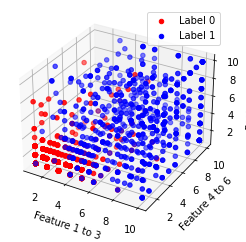

In [331]:
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and the 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the colors for the different classes
colors = {0: 'r', 1: 'b'}

# Create the scatter plot
for label in [0, 1]:
    indices = labels.values.ravel() == label
    ax.scatter(features.values[indices, 0:3], features.values[indices, 3:6], features.values[indices, 6:9], c=colors[label], label=label)

# Set the axis labels and the legend
ax.set_xlabel('Feature 1 to 3')
ax.set_ylabel('Feature 4 to 6')
ax.set_zlabel('Feature 7 to 9')
ax.legend(['Label 0', 'Label 1'])


# Show the plot
plt.show()



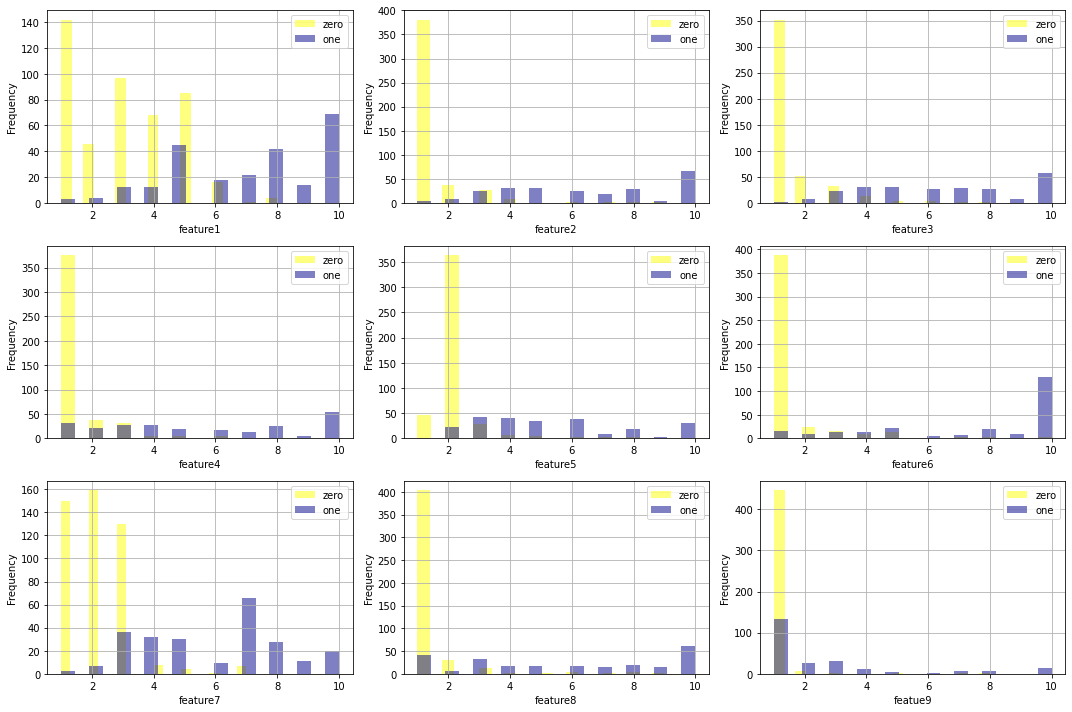

In [332]:
# Define colors for each class
colors = {0: 'Yellow', 1: 'DarkBlue'}

# Create the subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Loop over the features and create a histogram for each one
for i, feature in enumerate(features):
    row = i//3
    col = i%3
    ax = axs[row, col]
    for cls in [0, 1]:
        data_df[data_df['class'] == cls][feature].hist(alpha=0.5, color=colors[cls], bins=20, ax=ax, label='zero' if cls == 0 else 'one')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()


In [333]:
# Separate data by class label
class_0 = data.loc[data['class'] == 0]
class_1 = data.loc[data['class'] == 1]

# Compute statistical description of features for each class
for i, class_data in enumerate([class_0, class_1]):
    print(f'Statistical description for class {i}:')
    print('----------------------------------------')
    for feature in data.columns[:-1]:  # exclude class label column
        feature_data = class_data[feature]
        print(f'{feature}:')
        print(f'    mean: {np.mean(feature_data)}')
        print(f'    std: {np.std(feature_data)}')
        print(f'    max: {np.max(feature_data)}')
        print(f'    min: {np.min(feature_data)}')
        print(f'    median: {np.median(feature_data)}')
        print(f'    mode: {stats.mode(feature_data)[0]}')
        print(f'    Range: from {np.min(feature_data)} to {len(feature_data)}')
    print()

Statistical description for class 0:
----------------------------------------
feature1:
    mean: 2.9564270152505445
    std: 1.6706674466931175
    max: 8
    min: 1
    median: 3.0
    mode: [1]
    Range: from 1 to 459
feature2:
    mean: 1.3246187363834423
    std: 0.9058413778994282
    max: 9
    min: 1
    median: 1.0
    mode: [1]
    Range: from 1 to 459
feature3:
    mean: 1.4422657952069717
    std: 0.9958738880062087
    max: 8
    min: 1
    median: 1.0
    mode: [1]
    Range: from 1 to 459
feature4:
    mean: 1.363834422657952
    std: 0.9948009198767483
    max: 10
    min: 1
    median: 1.0
    mode: [1]
    Range: from 1 to 459
feature5:
    mean: 2.1198257080610023
    std: 0.9151467923450982
    max: 10
    min: 1
    median: 2.0
    mode: [2]
    Range: from 1 to 459
feature6:
    mean: 1.4379084967320261
    std: 1.3094098790213013
    max: 10
    min: 1
    median: 1.0
    mode: [1]
    Range: from 1 to 459
feature7:
    mean: 2.10239651416122
    std: 1.07879881

In [334]:
# Separate input features (X) and output label (y)
X = data_df.drop('class', axis=1)
y = data_df['class']

In [335]:
from sklearn.model_selection import train_test_split
# We split our dataset into train and test set:
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', train_X.shape,  train_y.shape)
print ('Test set:', test_X.shape,  test_y.shape)

Train set: (560, 9) (560,)
Test set: (140, 9) (140,)


In [354]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


# Set number of folds for cross-validation
numfolds = 5

# Define range of values for k
k_list = [1, 3, 5, 7, 9, 11, 13, 15]

# Initialize lists to store evaluation metrics for each value of k
precision_list = []
recall_list = []
accuracy_list = []
f1_score_list = []
std_accuracy_list = []

# Iterate over values of k
for k in k_list:

    # Initialize KNN classifier with current value of k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Initialize KFold cross-validation object
    kf = KFold(n_splits=numfolds)

    # Initialize lists to store evaluation metrics for each fold
    precision_fold_list = []
    recall_fold_list = []
    accuracy_fold_list = []
    f1_score_fold_list = []

    # Iterate over folds
    for train_index, val_index in kf.split(train_X):
        # Split data into training and validation sets
        X_train, X_val = train_X.iloc[train_index], train_X.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]

        # Fit KNN classifier to train data
        knn.fit(X_train, y_train)

        # Predict labels for validating data
        y_pred = knn.predict(X_val)

        # Compute evaluation metrics for this fold
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        

        # Append evaluation metrics to lists
        precision_fold_list.append(precision)
        recall_fold_list.append(recall)
        accuracy_fold_list.append(accuracy)
        f1_score_fold_list.append(f1)

    # Compute mean evaluation metrics over all folds for current value of k
    mean_precision = sum(precision_fold_list)/numfolds
    mean_recall = sum(recall_fold_list)/numfolds
    mean_accuracy = sum(accuracy_fold_list)/numfolds
    mean_f1_score = sum(f1_score_fold_list)/numfolds

    # Append mean evaluation metrics to lists
    precision_list.append(mean_precision)
    recall_list.append(mean_recall)
    accuracy_list.append(mean_accuracy)
    f1_score_list.append(mean_f1_score)
    std_accuracy = np.std(accuracy_fold_list)

# Find index of k value that maximizes the F1-score
best_k_index = f1_score_list.index(max(f1_score_list))
# best_k_index = accuracy_list.index(max(accuracy_list))
# best_k_index = recall_list.index(max(recall_list))
# best_k_index = precision_list.index(max(precision_list))

# Get the best value of k
best_k = k_list[best_k_index]

# Print results
# print(f'best k index: {best_k_index}, \nacc list: {accuracy_list}, \nPrecision list {precision_list}, \nf1: {f1_score_list}')
print(f'Best value of k: {best_k}')
print(f'Precision for best value of k: {precision_list[best_k_index]}')
print(f'Recall for best value of k: {recall_list[best_k_index]}')
print(f'Accuracy for best value of k: {accuracy_list[best_k_index]}')
print(f'F1-score for best value of k: {max(f1_score_list)}')

Best value of k: 3
Precision for best value of k: 0.9533190026600726
Recall for best value of k: 0.9615786901270773
Accuracy for best value of k: 0.9696428571428571
F1-score for best value of k: 0.9571154362664741


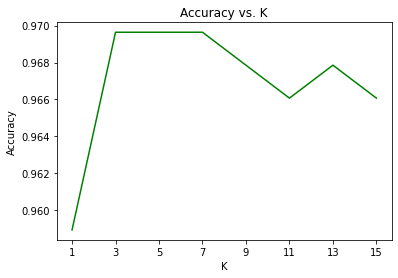

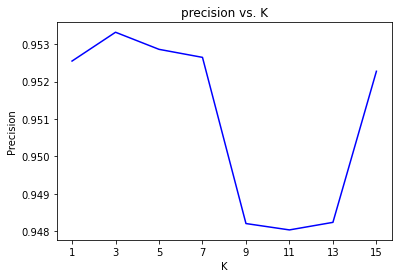

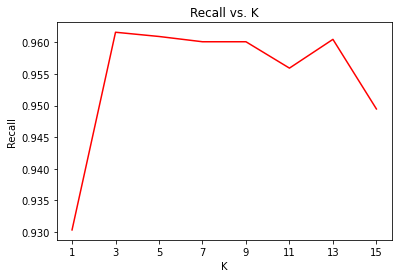

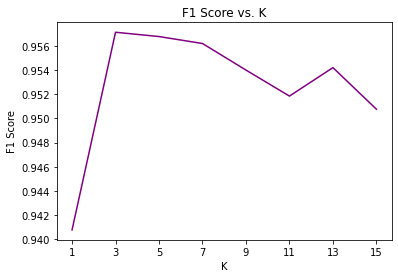

In [356]:
import matplotlib.pyplot as plt
%matplotlib inline


# Plot accuracy against k to confirm 
plt.plot(k_list, accuracy_list, 'g')
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_list)
plt.show()

plt.plot(k_list, precision_list, 'b')
plt.title('precision vs. K')
plt.xlabel('K')
plt.ylabel('Precision')
plt.xticks(k_list)
plt.show()

plt.plot(k_list, recall_list, 'r')
plt.title('Recall vs. K')
plt.xlabel('K')
plt.ylabel('Recall')
plt.xticks(k_list)
plt.show()

plt.plot(k_list, f1_score_list, 'purple')
plt.title('F1 Score vs. K')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.xticks(k_list)
plt.show()

In [338]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [339]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(test_X)
yhat

print(confusion_matrix(test_y, yhat, labels=[1,0]))

[[48  0]
 [ 4 88]]


Confusion matrix, without normalization
[[48  0]
 [ 4 88]]


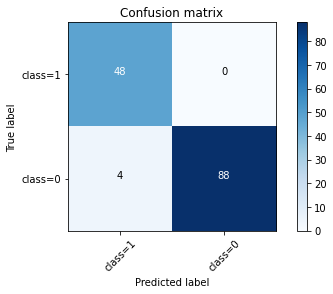

In [340]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=1','class=0'],normalize= False,  title='Confusion matrix')

In [341]:
print(classification_report(test_y, yhat))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        92
           1       0.92      1.00      0.96        48

    accuracy                           0.97       140
   macro avg       0.96      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140



# Logistic Regression

In [342]:
feat = np.asarray(X) 
feat[0:5]

labels = np.asarray(y)
labels[0:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

Now we normalize the data

In [343]:
from sklearn import preprocessing
feat = preprocessing.StandardScaler().fit(feat).transform(feat)
feat[0:5]

array([[-1.21, -0.7 , -0.41, -0.63, -0.1 ,  0.12, -1.  , -0.61, -0.34],
       [ 0.56, -0.7 , -0.74, -0.63, -0.55, -0.71, -0.18, -0.61, -0.34],
       [-0.5 , -0.7 , -0.74, -0.63, -0.55, -0.71, -0.18, -0.61, -0.34],
       [ 0.21,  0.61,  0.6 ,  1.12, -0.1 ,  1.78, -0.18, -0.61, -0.34],
       [-0.5 , -0.7 , -0.74, -0.63, -0.55,  1.23, -0.18, -0.61, -0.34]])

C values: [1.00e-05 1.78e-04 3.16e-03 5.62e-02 1.00e+00 1.78e+01 3.16e+02 5.62e+03
 1.00e+05]
Best values of C: 0.05623413251903491, 0.0031622776601683794
Cross-validation accuracy for best value of C: 0.9642857142857142
Cross-validation precision for best value of C: 0.9626168224299065


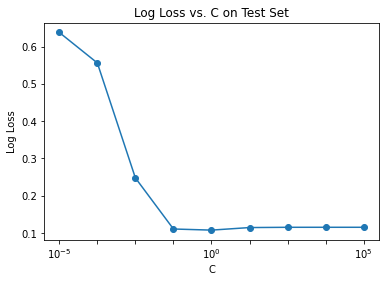

In [344]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import log_loss, precision_score, recall_score, f1_score

# Define range of values for C
C_values = np.logspace(-5, 5, 9)

# Initialize lists to store evaluation metrics for each value of C
accuracy_list = []
log_loss_list = []
precision_list = []
recall_list = []
f1_score_list = []

# Iterate over values of C
for C in C_values:
    # Initialize logistic regression classifier with current value of C
    clf = LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Compute cross-validation accuracy, log loss, precision, recall, and F1 score for this value of C
    scores = cross_val_score(clf, feat, labels, cv=5)
    accuracy = np.mean(scores)
    log_loss_score = np.mean(-1 * cross_val_score(clf, feat, labels, cv=5, scoring='neg_log_loss'))
    y_pred = cross_val_predict(clf, feat, labels, cv=5)
    precision = precision_score(labels, y_pred)
    recall = recall_score(labels, y_pred)
    f1 = f1_score(labels, y_pred)

    # Append evaluation metrics to lists
    accuracy_list.append(accuracy)
    log_loss_list.append(log_loss_score)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)

# Find index of C value that maximizes the cross-validation accuracy
best_acc_index = accuracy_list.index(max(accuracy_list))
# best_lloss_index = log_loss_list.index(max(log_loss_list))
best_prec_index = precision_list.index(max(precision_list))
# best_re_index = recall_list.index(max(recall_list))
# best_f1_index = f1_score_list.index(max(f1_score_list))

# Get the best value of C for accuracy and precision metrics
best_acc_c = C_values[best_acc_index]
best_prec_c = C_values[best_prec_index]

# Print results
print(f'C values: {C_values}')
# print(f'acc list: {accuracy_list}, \nPrecision list {precision_list}')
print(f'Best values of C: {best_acc_c}, {best_prec_c}')
print(f'Cross-validation accuracy for best value of C: {accuracy_list[best_acc_index]}')
print(f'Cross-validation precision for best value of C: {precision_list[best_prec_index]}')


# Plot test set log loss against different values of C
plt.plot(C_values, log_loss_list, '-o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. C on Test Set')
plt.xticks(C_values)
plt.show()


In [345]:
LR = LogisticRegression(C=5.62e-02, solver='newton-cg').fit(train_X,train_y)

yhat_log = LR.predict(test_X) # predict using our test data
yhat_log

yhat_log_prob = LR.predict_proba(test_X) # predict_proba returns estimates for all classes, ordered by the label of classes. So, 
                                     # the first column is the probability of class 0, P(Y=0|X), and second column is 
                                     # probability of class 1, P(Y=1|X)


LR1 = LogisticRegression(C=3.16e-03, solver='newton-cg').fit(train_X,train_y)

yhat_log1 = LR1.predict(test_X) # predict using our test data

yhat_log_prob1 = LR1.predict_proba(test_X)
print(yhat_log_prob[0:5])
print(yhat_log_prob1[0:5])

[[0.99 0.01]
 [1.   0.  ]
 [0.   1.  ]
 [0.97 0.03]
 [0.99 0.01]]
[[0.96 0.04]
 [0.98 0.02]
 [0.04 0.96]
 [0.93 0.07]
 [0.96 0.04]]


Confusion matrix, without normalization
[[47  1]
 [ 3 89]]
Confusion matrix, without normalization
[[45  3]
 [ 2 90]]


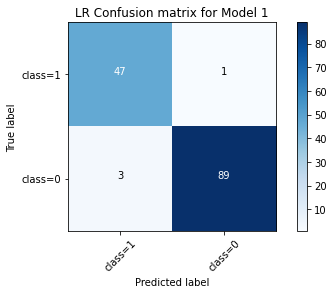

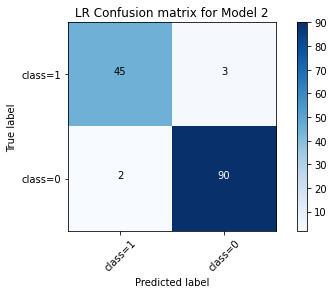

In [346]:
# Compute confusion matrix for Logistic Regression Model
cnf_matrix_LR = confusion_matrix(test_y, yhat_log, labels=[1,0])
np.set_printoptions(precision=2)

cnf_matrix_LR1 = confusion_matrix(test_y, yhat_log1, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_LR, classes=['class=1','class=0'],normalize= False,  title='LR Confusion matrix for Model 1')
plt.figure()
plot_confusion_matrix(cnf_matrix_LR1, classes=['class=1','class=0'],normalize= False,  title='LR Confusion matrix for Model 2')

In [347]:
print(f' classification report for Model 1: \n{classification_report(test_y, yhat_log)}')

 classification report for Model 1: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        92
           1       0.94      0.98      0.96        48

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



# Support Vector Machine

In [348]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define range of values for kernel types
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize lists to store evaluation metrics for each kernel type
accuracy_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []

# Initialize KFold cross-validation object
kf = KFold(n_splits=5)

# Iterate over kernel types
for kernel_type in kernel_types:

    # Initialize SVM classifier with current kernel type
    svm = SVC(kernel=kernel_type)

    # Initialize lists to store evaluation metrics for each fold
    accuracy_fold_list = []
    precision_fold_list = []
    recall_fold_list = []
    f1_score_fold_list = []

    # Iterate over folds
    for train_index, val_index in kf.split(train_X):
        # Split data into training and validating sets
        X_train, X_val = train_X.iloc[train_index], train_X.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]

        # Fit SVM classifier to training/validation data
        svm.fit(X_train, y_train)

        # Predict labels for testing data
        y_pred = svm.predict(X_val)

        # Compute evaluation metrics for this fold
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred) 

        # Append evaluation metrics to lists
        accuracy_fold_list.append(accuracy)
        precision_fold_list.append(precision)
        recall_fold_list.append(recall)
        f1_score_fold_list.append(f1)
        

    # Compute mean evaluation metrics over all folds for current kernel type
    mean_precision = sum(precision_fold_list)/n_folds
    mean_recall = sum(recall_fold_list)/n_folds
    mean_accuracy = sum(accuracy_fold_list)/n_folds
    mean_f1_score = sum(f1_score_fold_list)/n_folds

    # Append mean evaluation metrics to lists
    precision_score_list.append(mean_precision)
    recall_score_list.append(mean_recall)
    accuracy_list.append(mean_accuracy)
    f1_score_list.append(mean_f1_score)
    
# Find index of kernel type that maximizes the accuracy
best_acc_kernel_index = accuracy_list.index(max(accuracy_list))
best_prec_kernel_index = precision_score_list.index(max(precision_score_list))
# best_kernel_index = recall_score_list.index(max(recall_list))
# best_kernel_index = f1_score_list.index(max(f1_score_list))

# Get the best kernel type
best_acc_kernel = kernel_types[best_acc_kernel_index]
best_prec_kernel = kernel_types[best_prec_kernel_index]

# Print results
print(f'Best kernel types: {best_acc_kernel} & {best_prec_kernel}')
print(f'Accuracy for best kernel type: {max(accuracy_list)}')
print(f'Precision for best value of k: {precision_score_list[best_prec_kernel_index]}')


Best kernel types: rbf & poly
Accuracy for best kernel type: 0.9678571428571429
Precision for best value of k: 0.9530225777133369


In [349]:
svf = SVC(kernel='rbf')
svf.fit(train_X,train_y)
yhat_svm = svf.predict(test_X) # predict using our test data for radial basis function kernel

svf1 = SVC(kernel='poly')
svf1.fit(train_X,train_y)
yhat_svm1 = svf1.predict(test_X) # predict using our test data for poly kernel

print(f'{yhat_svm} \n{yhat_svm1}')

[0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1] 
[0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1]


Confusion matrix, without normalization
[[47  1]
 [ 4 88]]
Confusion matrix, without normalization
[[45  3]
 [ 2 90]]


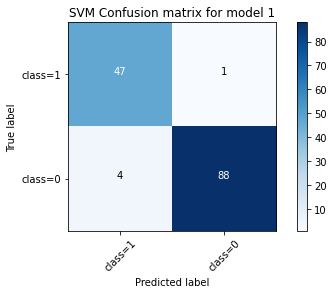

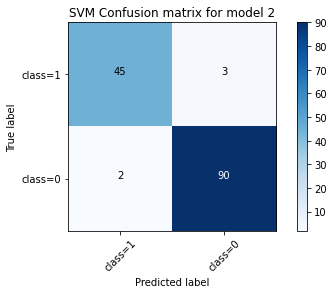

In [350]:
# Compute confusion matrix for SVM Model1
cnf_matrix_svm = confusion_matrix(test_y, yhat_svm, labels=[1,0])
np.set_printoptions(precision=2)

# Compute confusion matrix for SVM Model2
cnf_matrix_svm1 = confusion_matrix(test_y, yhat_svm1, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_svm, classes=['class=1','class=0'],normalize= False,  title='SVM Confusion matrix for model 1')
plt.figure()
plot_confusion_matrix(cnf_matrix_svm1, classes=['class=1','class=0'],normalize= False,  title='SVM Confusion matrix for model 2')

In [351]:
print(f' classification report for rbf kernel: \n{classification_report(test_y, yhat_svm)}')

 classification report for rbf kernel: 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        92
           1       0.92      0.98      0.95        48

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140

